In [1]:
import pandas as pd
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [ ]:
#!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()


You would need to dummify the species, sex, and island variables in the penguins dataset



Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [3]:
#Prepare data
penguins["BLsquare"] = penguins['bill_length_mm']**2
penguins["BLcubed"] = penguins['bill_length_mm']**3
penguins["BLten"] = penguins['bill_length_mm']**10

X = penguins['bill_length_mm'].values.reshape(-1,1)
y = penguins['bill_depth_mm'].values



In [4]:
from sklearn.model_selection import train_test_split
#Simple Linear Regression
lr = LinearRegression()
#fit model
lr_fit = lr.fit(X, y)
#predictions
y_pred_lr = lr_fit.predict(X)
# Add predictions to the original dataframe for plotting
penguins['SimpleModel'] = y_pred_lr


In [5]:
#Quadratic
X = penguins['BLsquare'].values.reshape(-1,1)

#fit model
lr_fit = lr.fit(X, y)
#predictions
y_pred_lr = lr_fit.predict(X)
# Add predictions to the original dataframe for plotting
penguins['QuadModel'] = y_pred_lr


In [6]:
#Cubic
X = penguins['BLcubed'].values.reshape(-1,1)

#fit model
lr_fit = lr.fit(X, y)
#predictions
y_pred_lr = lr_fit.predict(X)
# Add predictions to the original dataframe for plotting
penguins['CubeModel'] = y_pred_lr

In [7]:
#ten degree
X = penguins['BLten'].values.reshape(-1,1)

#fit model
lr_fit = lr.fit(X, y)
#predictions
y_pred_lr = lr_fit.predict(X)
# Add predictions to the original dataframe for plotting
penguins['TenModel'] = y_pred_lr

In [8]:
penguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,BLsquare,BLcubed,BLten,SimpleModel,QuadModel,CubeModel,TenModel
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1528.81,59776.471,8.351559e+15,17.567673,17.542639,17.509238,17.229772
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1560.25,61629.875,9.246363e+15,17.534742,17.515421,17.487461,17.228358


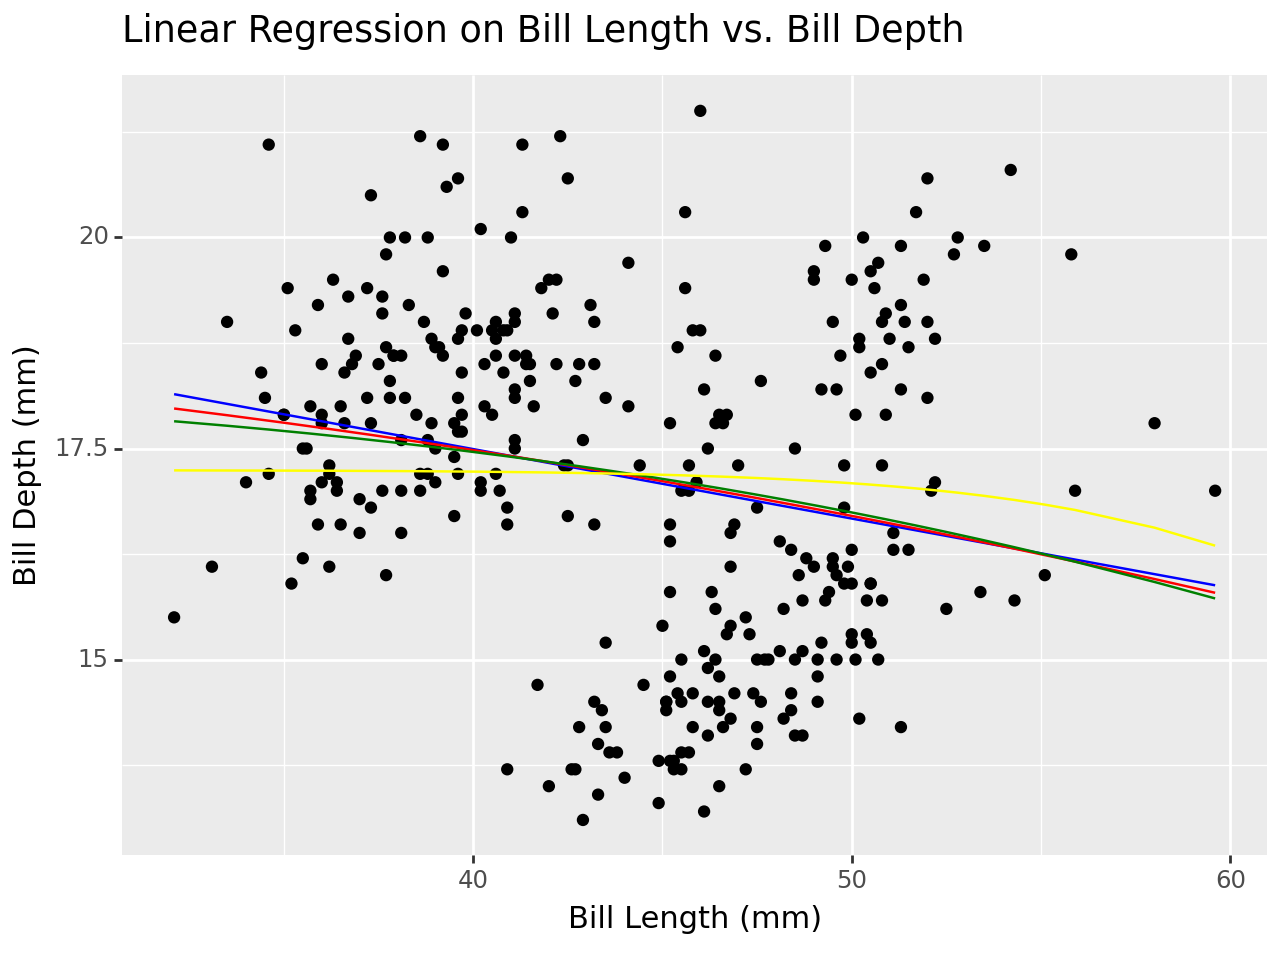

In [9]:
# Create the scatterplot
plot = (ggplot(penguins, aes(x='bill_length_mm', y='bill_depth_mm'))
     + geom_point()
    + geom_line(aes(y='SimpleModel'), color='blue')
    + geom_line(aes(y='QuadModel'), color='red')
    + geom_line(aes(y='CubeModel'), color='g')
    + geom_line(aes(y='TenModel'), color='yellow')
    + labs(title='Linear Regression on Bill Length vs. Bill Depth',
          x='Bill Length (mm)', y='Bill Depth (mm)') )
print(plot)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of the models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The given data may need to be transformed in order to create a better model, although with the given structure we can evaluate based on the models above. The TenModel (Yellow) appears to be overfitting the data as it has a greater curve than the other 3 models. The other 3 models are very similar and it is hard to distinguish exactly which is the most effective because the data probably needing to be transformed as previously mentioned.